# Gibbs Sampler 

### Enunciado:

#### La idea de este Código es crear un algoritmo que use el Gibbs Sampler y nos permita hacer un análisis estadístico sobre unos datos interesantes. El caso que vamos a estudiar es una señal de estabilidad del laboratorio de Óptica Cuántica de la universidad de los Andes. Vamos a intentar crear un regresión sobre los datos con el Gibbs Sampler.

In [4]:
import numpy as np
import scipy as sc
from scipy.stats import invgamma,invwishart, norm,multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data=pd.read_excel("29.08.2022.xlsx")[0:5000] #Leemos los datos y escogemos un rango porque el numero de datos es muy grande.
len(data)

5000

In [6]:
data

,Time [ms],"Signal 1 Wavelength, vac. [nm]"
0,20,852.35622
1,40,852.35622
2,60,852.35622
3,80,852.35622
4,100,852.35622
...,...,...
4995,100150,852.35625
4996,100169,852.35625
4997,100190,852.35625
4998,100210,852.35625


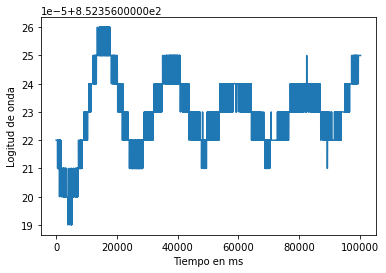

In [7]:
llaves=data.keys()
x=(data[llaves[0]])
y=(data[llaves[1]])
plt.xlabel("Tiempo en ms")
plt.ylabel("Logitud de onda")
plt.plot(x,y) # Mostramos un imagen de como se ve la señal de estabilidad de un láser.

#### En este paso creamos dos funciones para poder obtener los valores de la media(mean) y la varianza (var) solo teniendo encuenta una de estas.

In [8]:
def distribucion_normal(data:list,var:float):
        dist=np.random.normal(loc=np.mean(data),scale=var/len(data))
        return dist
def distribucion_inversa_gamma(data:list,mean:float):
        gamma=invgamma.rvs(a=len(data)/2,scale=sum((data-mean)**2)/2) 
        return gamma

#### Aquí creamos nuestro algoritmo que itera 2000 hasta que converge y nos halle valores de media y varianza muy similares a los de nuestro datos. Usamos solo la componente Y de los datos para generar nuestra secuencia.

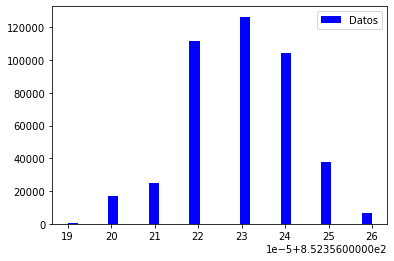

In [9]:
plt.hist(y,color='blue',density=True,bins=30,label="Datos" )
plt.legend()

In [10]:
mean=0.0
var=0.0
n=2000
for i in range(n):
    var=distribucion_inversa_gamma(y,mean)
    mean=distribucion_normal(y,var)
    var=np.sqrt(var)
    

#### Valores obtenidos por nuestro algoritmo:

In [11]:
mean,var

(852.356229664024, 1.2669931051153975e-05)

#### Valores reales:

In [12]:
np.mean(y),np.std(y)

(852.356229664024, 1.2595519202465037e-05)

# Gráfica de la estimación:

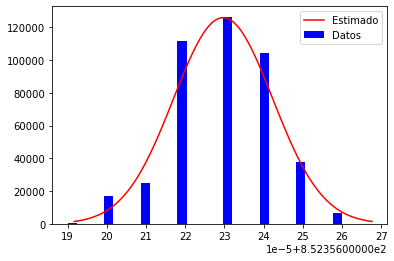

In [13]:
xx = np.linspace(mean-3*var,mean+3*var,100)
yy = norm.pdf(xx, loc=mean, scale=var)
plt.plot(xx, yy*4,color="red",label="Estimado")
plt.hist(y,color='blue',density=True,bins=30,label="Datos" )
plt.legend()

## Bibliografía:

[1]Mikhailiuk, A. (2022, 19 septiembre). Sampling distributions with an emphasis on Gibbs sampling, practicals and code. Medium. Recuperado 17 de octubre de 2022, de https://towardsdatascience.com/can-you-do-better-sampling-strategies-with-an-emphasis-on-gibbs-sampling-practicals-and-code-c97730d54ebc

[2]Lambert, B. (2018, May 15). How to derive a Gibbs sampling routine in general - YouTube [Video file]. YouTube. Retrieved from https://www.youtube.com/watch?v=9e4uqODjooo

[3]Ritvikmath,. (2021, January 27). Gibbs Sampling : Data Science Concepts - YouTube [Video file]. YouTube. Retrieved from https://www.youtube.com/watch?v=7LB1VHp4tLE

[4]Jeffrey W. Miller (2015). Lecture Notes on Bayesian Statistics. Duke University, Durham, NC.